In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:

df=pd.read_csv('Train.csv')
df1=pd.read_csv('Test.csv')
#Appending two dataframes
dfs=df.append(df1)
dfs.reset_index(inplace=True)
#Dropping the segmentations
dfs.drop(['Segmentation','index'],inplace=True,axis=1)

C:\Users\Shannon DIas\AppData\Local\Temp\ipykernel_16232\3623791558.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs=df.append(df1)


In [3]:
print(dfs.isnull().sum())
#Dropping null values and replacing with modes and average values
m1=int(dfs['Work_Experience'].mean())
m2=int(dfs['Family_Size'].mean())
#Float values replaced by Averaging Values
dfs['Work_Experience'].fillna(float(m1),inplace=True)
dfs['Family_Size'].fillna(float(m2),inplace=True)
#Categorical values replaced by Mode values
for i in ['Graduated','Ever_Married','Profession','Var_1']:
    dfs[i].fillna(dfs[i].mode()[0],inplace=True)
print(dfs.info())
print(dfs.describe())

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10695 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10695 non-null  object 
 5   Profession       10695 non-null  object 
 6   Work_Experience  10695 non-null  float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10695 non-null  float64
 9   Var_1            10695 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 835.7+ KB
None
                 

In [4]:
#Checking if there is any number in the categorical value columns
for k in ['Spending_Score','Gender','Ever_Married','Graduated','Profession','Spending_Score']:
    for i in dfs[k]:
        for j in i:
            if j.isdigit():
                print(i)
#Checking if there is any alphabet in the numerical value of columns
for k in ['ID','Age','Work_Experience','Family_Size']:
    for i in dfs[k]:
        for j in str(i):
            if str(j).isalpha():
                print(i)

In [5]:
dfs1=dfs[['Age','Work_Experience','Family_Size']]
dfs1=dfs1.T
dfs1['mean']=dfs1.apply(np.mean,axis=1)
dfs1['std']=dfs1.apply(np.std,axis=1)
dfs1['stderror']=dfs1['std']/np.sqrt(len(dfs1))
print(dfs1.head())

                    0     1     2     3     4     5     6     7     8     9  \
Age              22.0  38.0  67.0  67.0  40.0  56.0  32.0  33.0  61.0  55.0   
Work_Experience   1.0   2.0   1.0   0.0   2.0   0.0   1.0   1.0   0.0   1.0   
Family_Size       4.0   3.0   1.0   2.0   6.0   2.0   3.0   3.0   3.0   4.0   

                 ...  10688  10689  10690  10691  10692  10693  10694  \
Age              ...   21.0   35.0   29.0   35.0   53.0   47.0   43.0   
Work_Experience  ...    1.0    1.0    9.0    1.0    2.0    1.0    9.0   
Family_Size      ...    4.0    2.0    4.0    1.0    2.0    5.0    3.0   

                      mean        std  stderror  
Age              43.511828  16.772590  9.683659  
Work_Experience   2.556148   3.217206  1.857455  
Family_Size       2.808696   1.513236  0.873667  

[3 rows x 10698 columns]


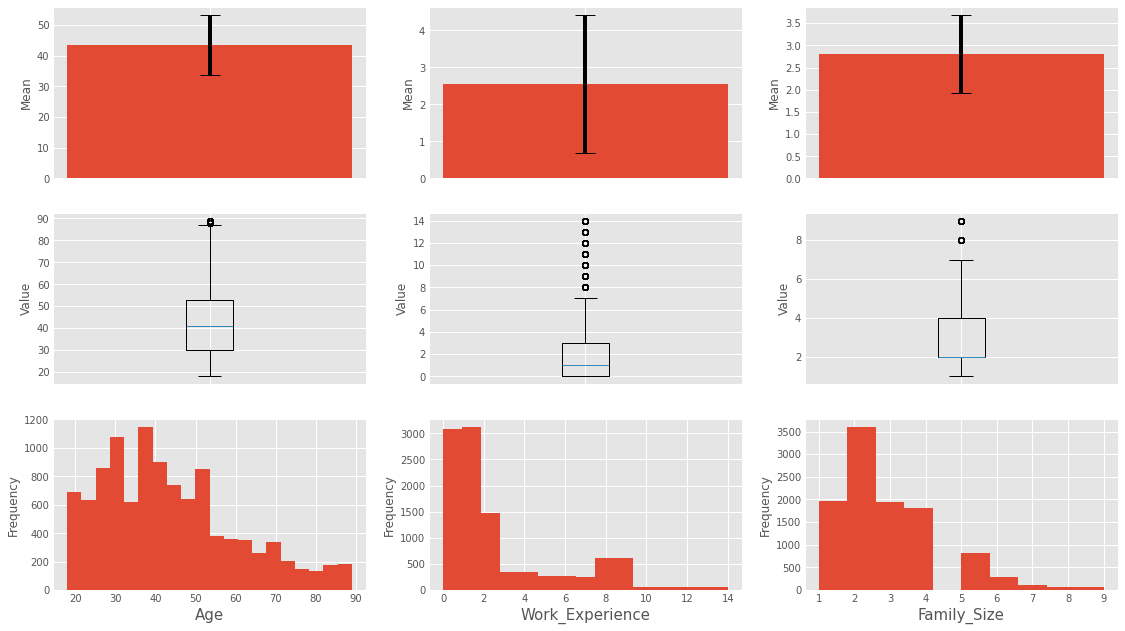

In [33]:
#Age,work,family
plt.style.use('ggplot')
(fig,ax)=plt.subplots(3,3,figsize=(17,10))
for i,j in zip(range(3),['Age','Work_Experience','Family_Size']):
    ax[0,i].bar(x=[j],height=[dfs1['mean'].iloc[i]])
    ax[0,i].set_ylabel("Mean")
    ax[0,i].errorbar(x=[j],y=[dfs1['mean'].iloc[i]],yerr=[dfs1['stderror'].iloc[i]],color='black',capsize=10)
    ax[0,i].tick_params(labelbottom=False)
    ax[1,i].boxplot(x=dfs[j])
    ax[1,i].tick_params(labelbottom=False)
    ax[1,i].set_ylabel("Value")
    ax[2,i].hist(x=dfs[j],bins=20-(i*5))
    ax[2,i].set_xlabel(j,fontsize=15)
    ax[2,i].set_ylabel('Frequency')
plt.show()

4


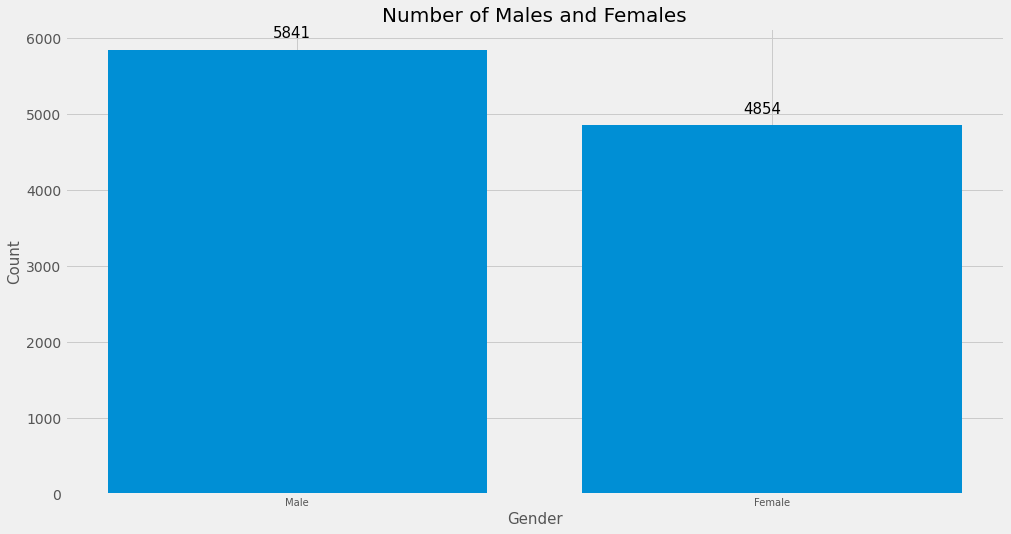

In [38]:
#Male,Female count
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
ax=plt.gca()
plt.bar(x=['Male','Female'],height=[len(dfs[dfs['Gender']=='Male']),len(dfs[dfs['Gender']=='Female'])])
plt.ylabel('Count',fontsize=15)
plt.xlabel('Gender',fontsize=15)
plt.xticks(fontsize=10)
#print(len(str(len(dfs[dfs['Gender']=='Male']))))
plt.annotate(len(dfs[dfs['Gender']=='Male']),(0-(len(str(len(dfs[dfs['Gender']=='Male'])))*0.013),6000),fontsize=15)
plt.annotate(len(dfs[dfs['Gender']=='Female']),(1-(len(str(len(dfs[dfs['Gender']=='Female'])))*0.015),5000),fontsize=15)
plt.title("Number of Males and Females",fontsize=20) 
plt.show()

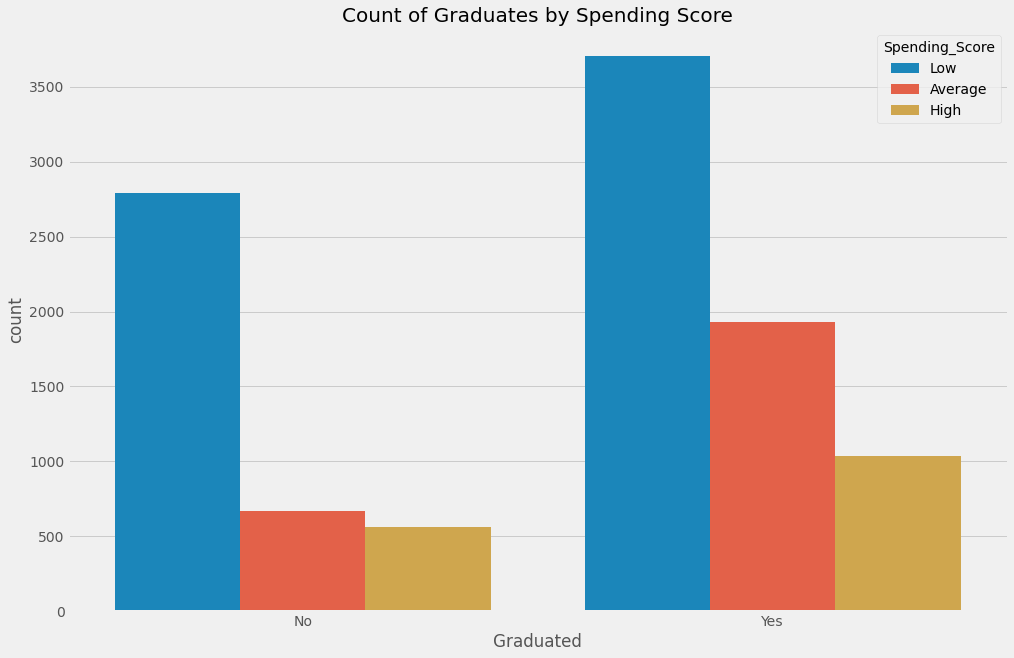

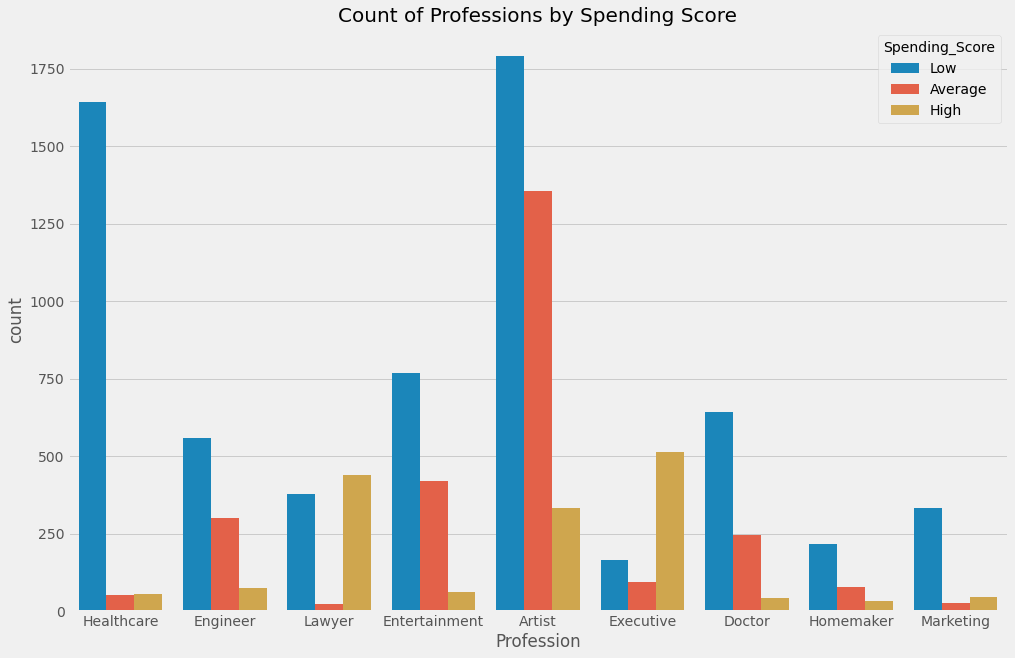

In [40]:
#countplots for Graduated people and Professions with spending scores
plt.figure(figsize=(15,10))
sns.countplot(x="Graduated",hue="Spending_Score",data=dfs)
plt.title("Count of Graduates and non-Graduates by Spending Score",fontsize=20)
plt.figure(figsize=(15,10))
sns.countplot(x='Profession',hue='Spending_Score',data=dfs)
plt.title("Count of Professions by Spending Score",fontsize=20)
plt.show()

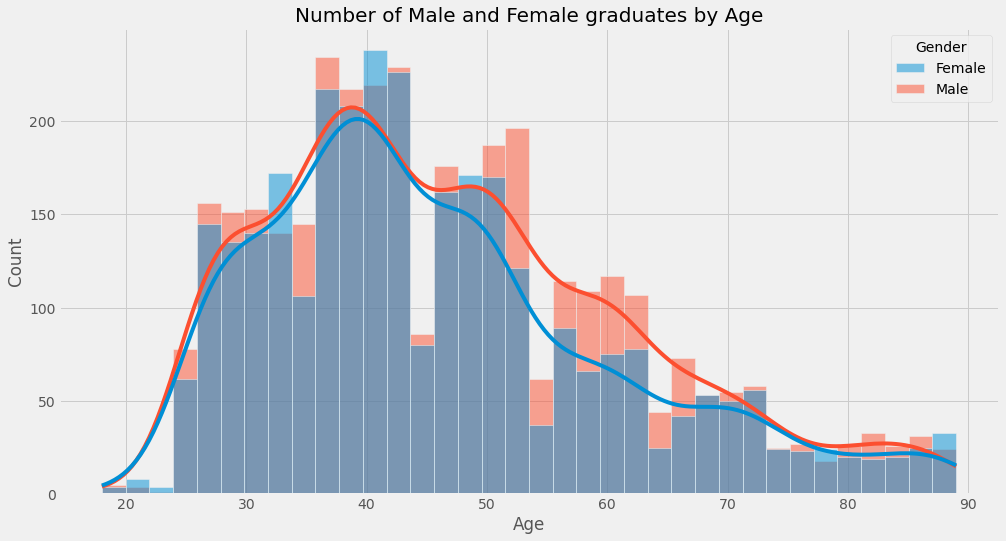

In [41]:
#Males and Females who have graduated according to Age
plt.figure(figsize=(15,8))
dfs2=dfs[['Gender','Age','Graduated']].where(dfs['Graduated']=='Yes').dropna()
sns.histplot(x=dfs2['Age'],hue=dfs2['Gender'],kde=True)
plt.title("Number of Male and Female graduates by Age",fontsize=20)
plt.show()

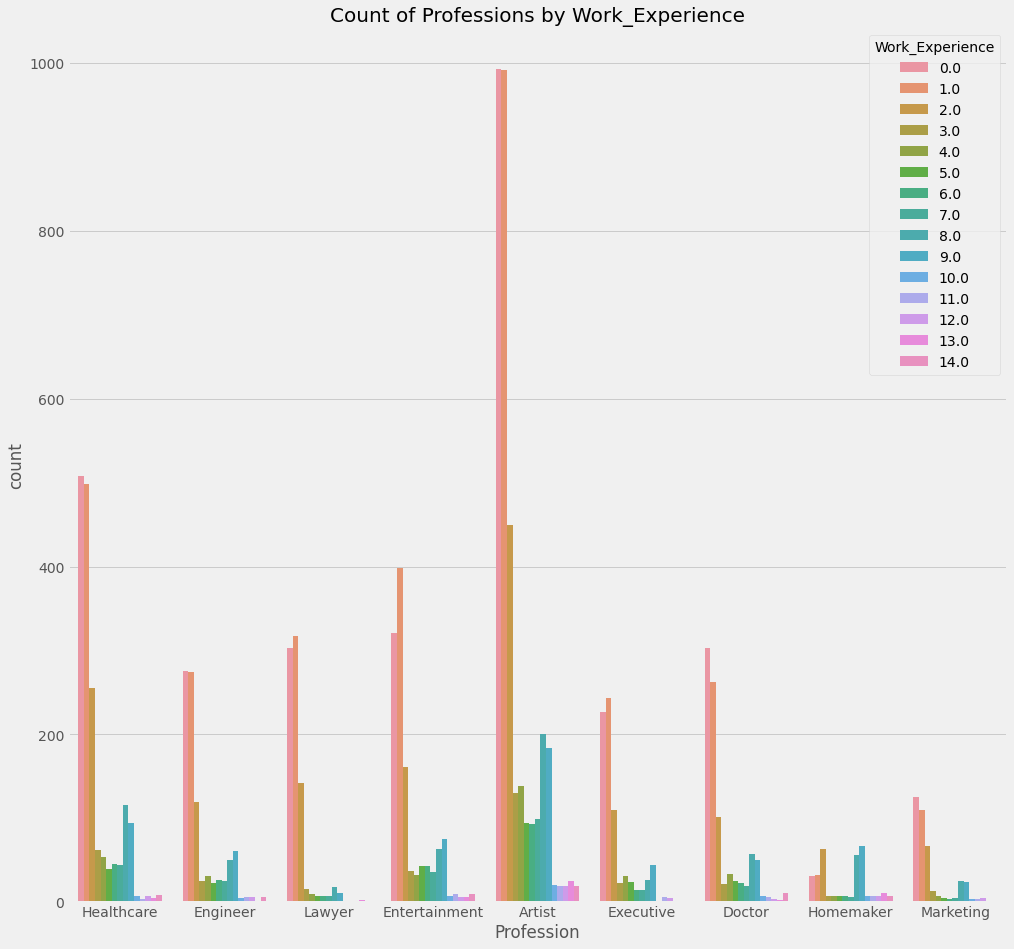

In [42]:
#Count of Profession with Work Experience
plt.figure(figsize=(15,15))
plt.title("Count of Professions by Work_Experience",fontsize=20)
sns.countplot(x='Profession',hue='Work Experience',data=dfs)
plt.show()

    Age  Work_Experience
0    18         1.631579
1    19         2.325581
2    20         2.234043
3    21         2.352941
4    22         1.707317
..  ...              ...
62   85         1.222222
63   86         0.357143
64   87         0.923077
65   88         1.625000
66   89         1.666667

[67 rows x 2 columns]


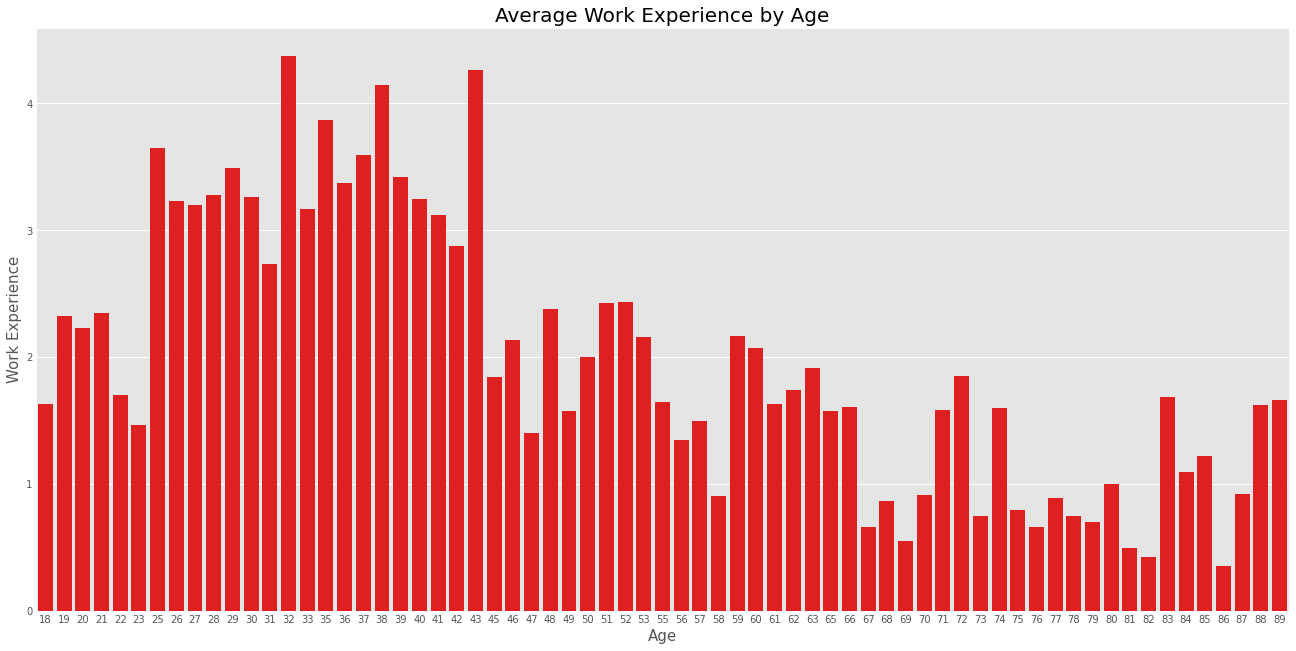

In [60]:
#Barplot of average work_Experience with age
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
dfs3=df1[['Age','Work_Experience']].groupby(['Age']).mean().reset_index()
dfs3.dropna(inplace=True)
print(dfs3)
s=sns.barplot(x='Age',y='Work_Experience',data=dfs3,color='r')
s.set_xlabel("Age",fontsize=15)
s.set_ylabel("Work Experience",fontsize=15)
s.set_title("Average Work Experience by Age",fontsize=20)
plt.show()

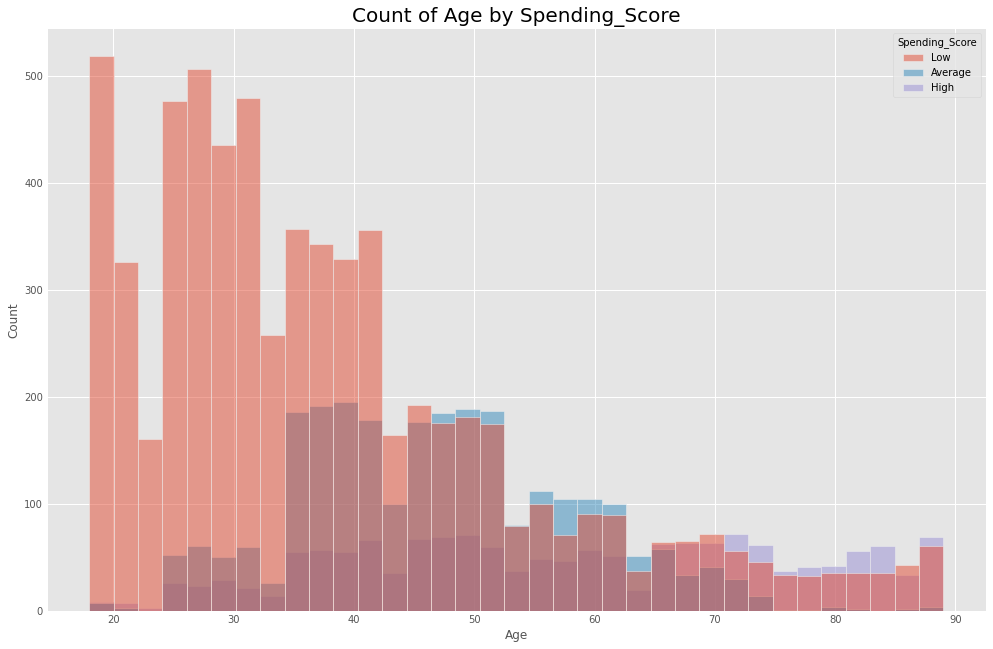

In [61]:
#Age and Spending_Score
plt.figure(figsize=(15,10))
plt.title("Count of Age by Spending_Score",fontsize=20)
sns.histplot(data=dfs,x='Age',hue='Spending_Score')
plt.show()

In [47]:
#Selecting only categorical columns
cat=dfs.select_dtypes(exclude=['int64','float64'])
#Dropping Id column
fdfs=dfs.drop('ID',axis=1)

In [48]:
#Labeling the categorical variables
for i in cat.columns:
    fdfs[i]=LabelEncoder().fit_transform(fdfs[i])
print(fdfs)
#Scaling the data
dfse=StandardScaler().fit_transform(fdfs)
print(dfse)

       Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0           1             0   22          0           5              1.0   
1           0             1   38          1           2              2.0   
2           0             1   67          1           2              1.0   
3           1             1   67          1           7              0.0   
4           0             1   40          1           3              2.0   
...       ...           ...  ...        ...         ...              ...   
10690       1             0   29          0           5              9.0   
10691       0             0   35          1           1              1.0   
10692       0             0   53          1           3              2.0   
10693       1             1   47          1           4              1.0   
10694       0             0   43          1           5              9.0   

       Spending_Score  Family_Size  Var_1  Lables  
0                   2          4.0 

In [49]:
#CLustering algo
W=[]
avgs=[]
scores=[]
avgs1=[]
scores1=[]
for i in range(2,10):
    km=KMeans(i,random_state=42)
    km.fit(dfse)
    w=km.inertia_ #Inertia or the WCSS
    W.append(w)
    labels = km.fit_predict(dfse)
    avg = silhouette_score(dfse, labels)
    score = silhouette_samples(dfse, labels)
    avgs.append(avg)
    scores.append(score)
    avg1 = calinski_harabasz_score(dfse, labels)
    avgs1.append(avg1)

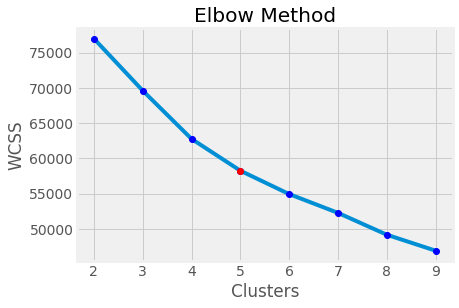

In [50]:
#Elbow
plt.figure()
plt.style.use('fivethirtyeight')
plt.plot(range(2,10),W,)
plt.plot(range(2,10),W,'o',color='blue')
plt.xlabel("Clusters")
plt.ylabel('WCSS')
plt.title("Elbow Method")
plt.plot(5,W[3],'o',color='red')
plt.show()

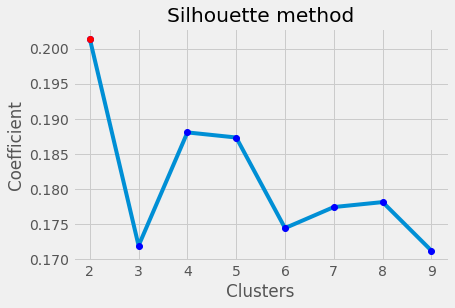

In [29]:
#Silhoutte method
plt.figure()
plt.style.use('fivethirtyeight')
plt.plot(range(2,10),avgs)
plt.plot(range(2,10),avgs,'o',color='blue')
plt.xlabel("Clusters")
plt.ylabel('Coefficient')
plt.title('Silhouette method')
plt.plot(2,avgs[0],'o',color='red')
plt.show()

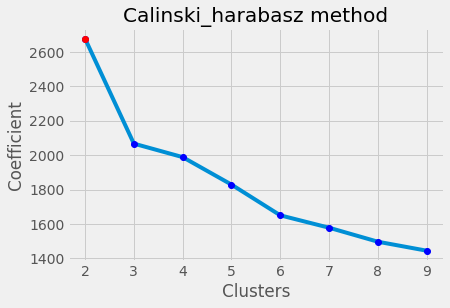

In [30]:
#Calinski_harabasz method
plt.figure()
plt.style.use('fivethirtyeight')
plt.plot(range(2,10),avgs1)
plt.plot(range(2,10),avgs1,'o',color='blue')
plt.xlabel("Clusters")
plt.ylabel('Coefficient')
plt.title("Calinski_harabasz method")
plt.plot(2,avgs1[0],'o',color='red')
plt.show()

In [54]:
#Hence we use two clusters as optimum number of clusters
kmeans=KMeans(2,random_state=42)
label=kmeans.fit_predict(dfse)
dfs['Labels']=label
print(dfs)

           ID  Gender Ever_Married  Age Graduated     Profession  \
0      462809    Male           No   22        No     Healthcare   
1      462643  Female          Yes   38       Yes       Engineer   
2      466315  Female          Yes   67       Yes       Engineer   
3      461735    Male          Yes   67       Yes         Lawyer   
4      462669  Female          Yes   40       Yes  Entertainment   
...       ...     ...          ...  ...       ...            ...   
10690  467954    Male           No   29        No     Healthcare   
10691  467958  Female           No   35       Yes         Doctor   
10692  467960  Female           No   53       Yes  Entertainment   
10693  467961    Male          Yes   47       Yes      Executive   
10694  467968  Female           No   43       Yes     Healthcare   

       Work_Experience Spending_Score  Family_Size  Var_1  Labels  
0                  1.0            Low          4.0  Cat_4       0  
1                  2.0        Average          